In [1]:
%matplotlib inline
import matplotlib.pyplot as plot
plt.rcParams['figure.dpi'] = 400
plt.rcParams['text.usetex'] = False

import astropy
from astropy.io import fits, ascii
import glob
from glob import glob
import numpy as np
from numpy import *
import os
import numpy as np
import matplotlib.pyplot as plt

import eazy
 
eazy.symlink_eazy_inputs()
import warnings
from astropy.utils.exceptions import AstropyWarning

np.seterr(all='ignore')
warnings.simplefilter('ignore', category=AstropyWarning)


/Users/rsimons/miniconda3/lib/python3.7/site-packages/eazy-0.2.0_49_g484e79d-py3.7.egg/eazy/data/templates -> ./templates
/Users/rsimons/miniconda3/lib/python3.7/site-packages/eazy-0.2.0_49_g484e79d-py3.7.egg/eazy/data/filters/FILTER.RES.latest -> ./FILTER.RES.latest


(0, 6)

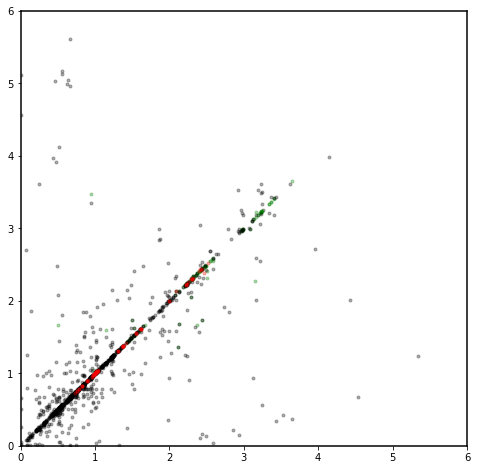

In [2]:
cat_dir = '/Users/rsimons/Desktop/clear/catalogs'
fig, ax = plt.subplots(1,1, figsize = (8,8))
kmos_3d_cat = fits.open(cat_dir + '/kmos_3d_cat.fits')[1].data
mosdef_cat = fits.open(cat_dir + '/mosdef_zcat.final.fits')[1].data
for f in ['s', 'n']:
    cat_v44_file = cat_dir + '/goods%s_3dhst.v4.4.cats/Catalog/goods%s_3dhst.v4.4.cat'%(f, f)
    cat_v44 = ascii.read(cat_v44_file)
    cat_v45 = cat_v44.copy()
    
    clear_cat = fits.open(cat_dir + '/grizli_v2.1_cats/GD%s_lines_grizli_master.fits'%f)[1].data
    
    if f == 's':
        # kmos-3d covers only goods-s
        for k in kmos_3d_cat:
            if (k['FIELD'] != 'GS') | (k['FLAG_ZQUALITY'] !=0): continue
            gd = where(cat_v44['id'] == k['ID_SKELTON'])[0]
            cat_v45['z_spec'][gd] =  k['Z']
            ax.plot(cat_v44['z_spec'][gd], k['Z'],'r.', alpha = 0.3, zorder = 10)


    for m in mosdef_cat:
        if (m['FIELD'] == 'GOODS-%s'%f.upper()) & (m['Z_MOSFIRE_ZQUAL'] >= 3):
            gd = where(cat_v44['id'] == m['ID_V4'])[0]
            if len(gd) > 0:
                ax.plot(cat_v44['z_spec'][gd], m['Z_MOSFIRE'],'g.', alpha = 0.3, zorder = 1)            
            
    for c in clear_cat:
        gd = where(cat_v44['id'] == c['id'])[0]
        if cat_v44['z_spec'][gd] > 0:
            ax.plot(cat_v44['z_spec'][gd], c['z_MAP'],'k.', alpha = 0.3, zorder = 1)
        if cat_v44['z_spec'][gd] < 0:
            cat_v45['z_spec'][gd] = c['z_MAP']
            
    cat_v45.meta['comments'][0].replace('v4.4', 'v4.5')
    cat_v45.meta['comments'].append('updated with CLEAR/KMOS-3D/MOSDEF Speczs by R.C. Simons and the CLEAR Team (2019/10/16)')

    ascii.write(cat_v45, cat_v44_file.replace('4.4', '4.5'), format = 'commented_header')
    
ax.set_xlim(0,6)
ax.set_ylim(0,6)
    

Read default param file: /Users/rsimons/miniconda3/lib/python3.7/site-packages/eazy-0.2.0_49_g484e79d-py3.7.egg/eazy/data/zphot.param.default
Read CATALOG_FILE: /Users/rsimons/Desktop/clear/catalogs/goodsn_3dhst.v4.5.cats/Catalog/goodsn_3dhst.v4.5.cat
f_F160W e_F160W (205): hst/wfc3/IR/f160w.dat
f_U e_U (103): ESO/vimos_u.res
f_F435W e_F435W (  1): hst/ACS_update_sep07/wfc_f435w_t77.dat
f_F606W e_F606W (  4): hst/ACS_update_sep07/wfc_f606w_t77.dat
f_R e_R (260): ESO/VIMOS/R.dat
f_F775W e_F775W (  5): hst/ACS_update_sep07/wfc_f775w_t77.dat
f_F850LP e_F850LP (  7): hst/ACS_update_sep07/wfc_f850lp_t77.dat
f_F125W e_F125W (203): hst/wfc3/IR/f125w.dat
f_J e_J ( 34): ESO/isaac_j.res
f_F140W e_F140W (204): hst/wfc3/IR/f140w.dat
f_H e_H ( 36): ESO/isaac_h.res
f_Ks e_Ks ( 37): ESO/isaac_ks.res
f_IRAC1 e_IRAC1 ( 18): IRAC/irac_tr1_2004-08-09.dat
f_IRAC2 e_IRAC2 ( 19): IRAC/irac_tr2_2004-08-09.dat
f_IRAC3 e_IRAC3 ( 20): IRAC/irac_tr3_2004-08-09.dat
f_IRAC4 e_IRAC4 ( 21): IRAC/irac_tr4_2004-08-09.

/Users/rsimons/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


Iteration:  1
3855
Compute best fits
Fit 9.7 s (n_proc=8, NOBJ=3855)
`error_residuals`: force uncertainties to match residuals
Iteration:  2
1961
Compute best fits
Fit 5.8 s (n_proc=8, NOBJ=1961)
`error_residuals`: force uncertainties to match residuals
Iteration:  3
2097
Compute best fits
Fit 6.0 s (n_proc=8, NOBJ=2097)
`error_residuals`: force uncertainties to match residuals
Iteration:  4
2144
Compute best fits
Fit 6.1 s (n_proc=8, NOBJ=2144)
`error_residuals`: force uncertainties to match residuals
Compute best fits
Fit 91.0 s (n_proc=8, NOBJ=39005)


/Users/rsimons/miniconda3/lib/python3.7/site-packages/eazy-0.2.0_49_g484e79d-py3.7.egg/eazy/photoz.py:497: UserWarning: Attempting to set identical bottom == top == -0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(-6*sample_nmad, 6*sample_nmad)


Get best fit coeffs & best redshifts
Get parameters (UBVJ=[153, 154, 155, 161], LIR=[8, 1000])
Rest-frame filters: [153, 154, 155, 161]


/Users/rsimons/miniconda3/lib/python3.7/site-packages/eazy-0.2.0_49_g484e79d-py3.7.egg/eazy/photoz.py:2499: RuntimeWarning: covariance is not positive-semidefinite.
  coeffs_draw[:, ok_temp] = np.random.multivariate_normal(coeffs_i[ok_temp], covar, size=get_err)


Rest-frame filters: [270, 274, 120, 121, 156, 157, 158, 159, 160, 161, 162, 163]
Read default param file: /Users/rsimons/miniconda3/lib/python3.7/site-packages/eazy-0.2.0_49_g484e79d-py3.7.egg/eazy/data/zphot.param.default
Read CATALOG_FILE: /Users/rsimons/Desktop/clear/catalogs/goodsn_3dhst.v4.5.cats/Catalog/goodsn_3dhst.v4.5.cat
f_F160W e_F160W (205): hst/wfc3/IR/f160w.dat
f_U e_U (227): NOAO/k1001bp_jul04.txt
f_F435W e_F435W (233): hst/ACS_update_sep07/wfc_f435w_t81.dat
f_G e_G (229): LRIS/g_blue_transmission.dat
f_F606W e_F606W (236): hst/ACS_update_sep07/wfc_f606w_t81.dat
f_Rs e_Rs (231): LRIS/Rs_LRISred_transmission.dat
f_F775W e_F775W (238): hst/ACS_update_sep07/wfc_f775w_t81.dat
f_F850LP e_F850LP (240): hst/ACS_update_sep07/wfc_f850lp_t81.dat
f_F125W e_F125W (203): hst/wfc3/IR/f125w.dat
f_J e_J (224): MOIRCS/J277.txt
f_F140W e_F140W (204): hst/wfc3/IR/f140w.dat
f_H e_H (225): MOIRCS/H117.txt
f_Ks e_Ks (226): MOIRCS/Ks_rot1707wedged120K.txt
f_IRAC1 e_IRAC1 ( 18): IRAC/irac_tr1_2

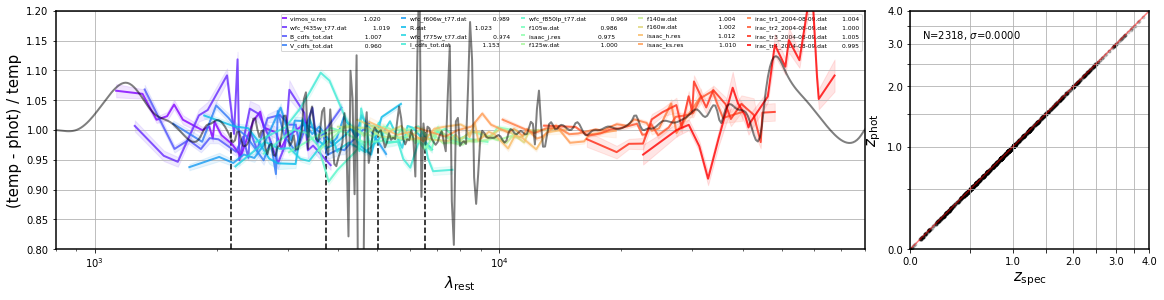

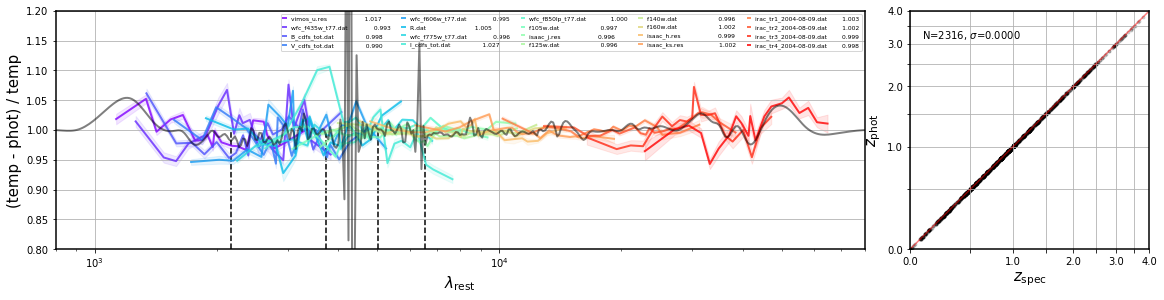

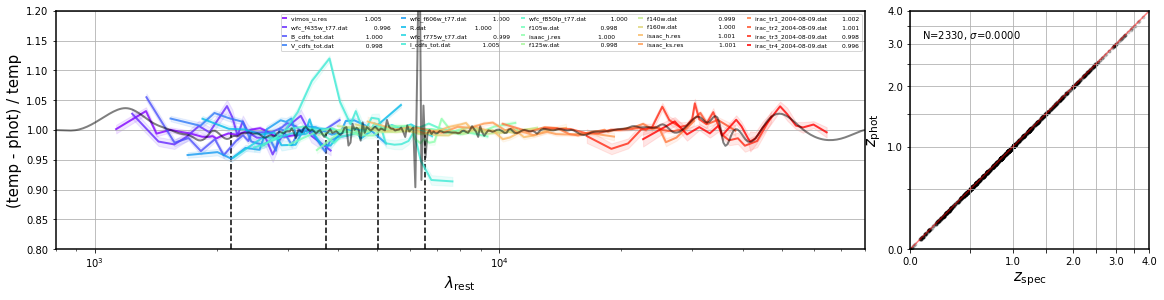

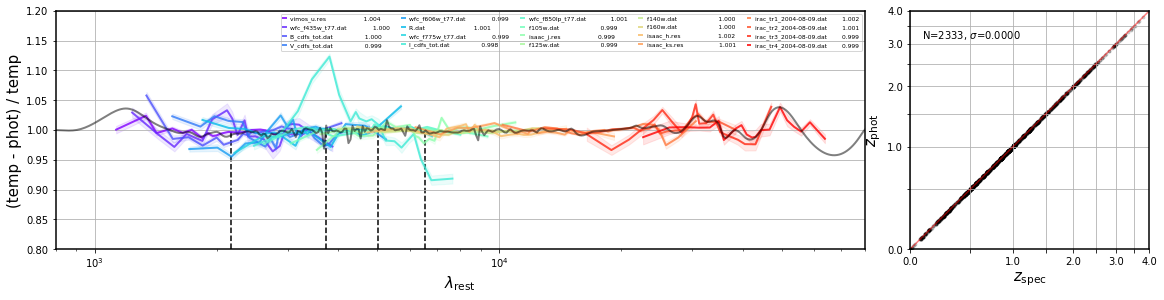

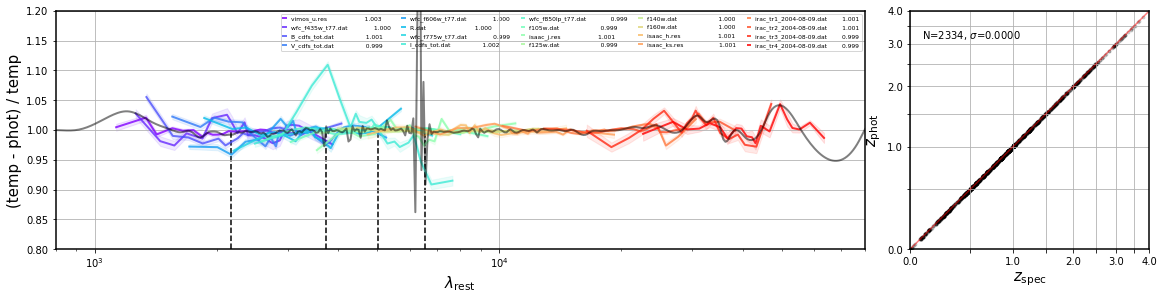

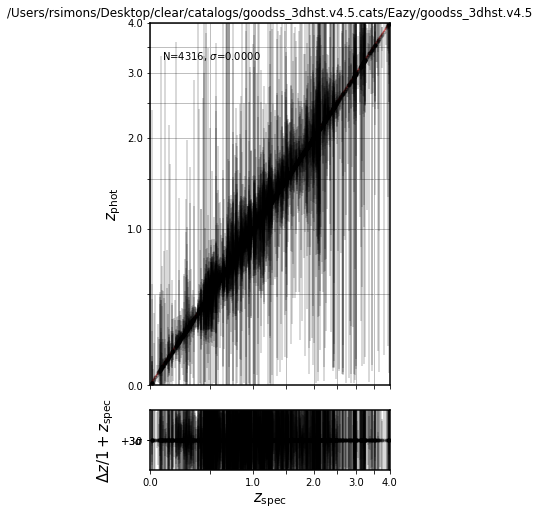

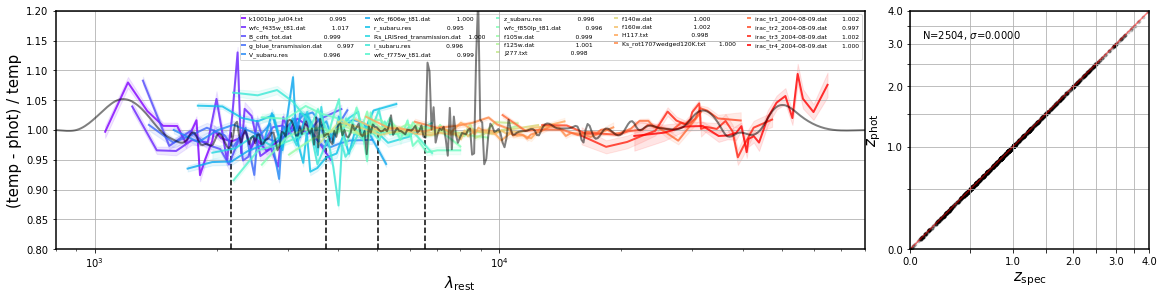

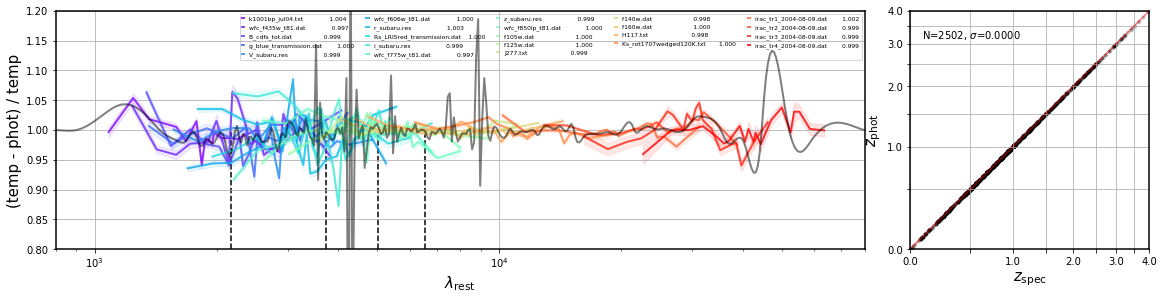

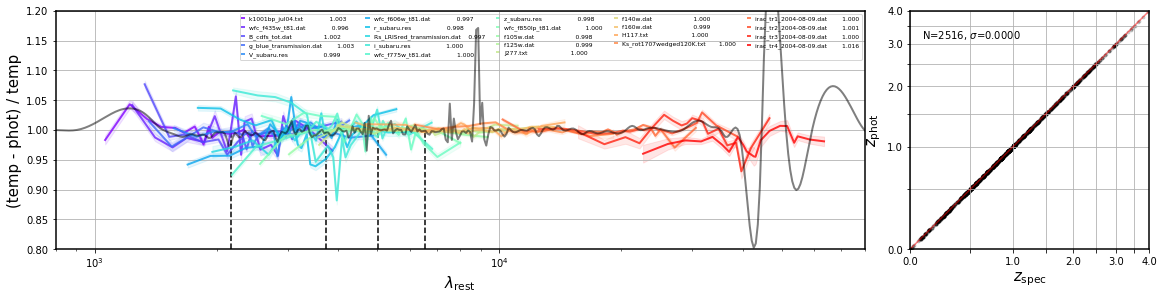

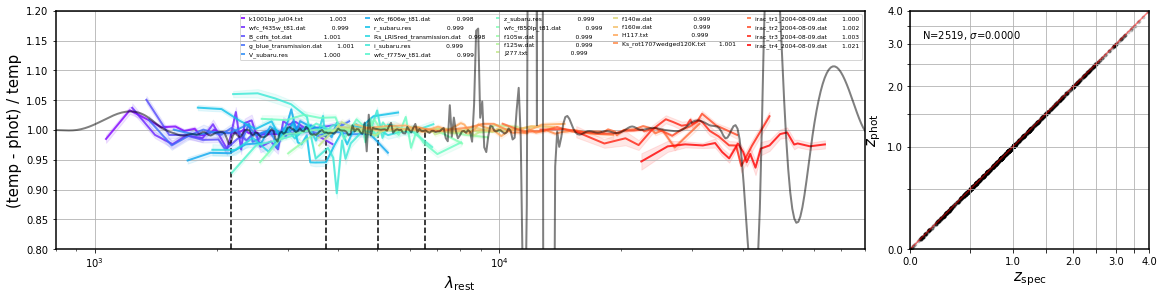

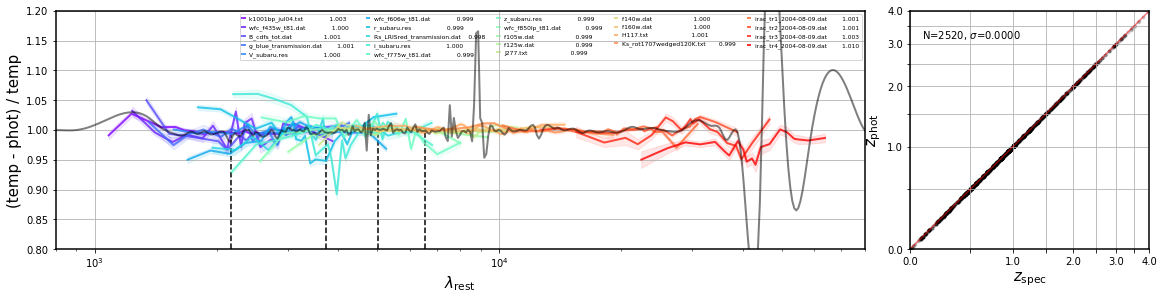

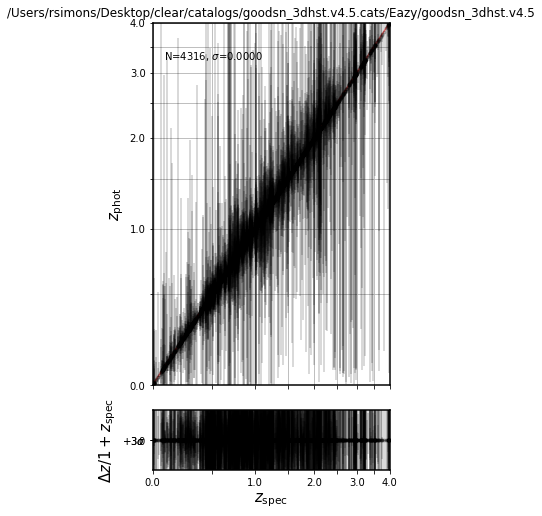

In [3]:
for field in ['goodss', 'goodsn']:
    n = 2

    params = {}

    params['CATALOG_FILE'] =  cat_v44_file.replace('4.4', '4.5')
    params['PRIOR_FILE'] = 'templates/prior_F160W_TAO.dat'
    params['PRIOR_FILTER'] = 205


    params['MAIN_OUTPUT_FILE'] = cat_dir + '/%s_3dhst.v4.5.cats/Eazy/%s_3dhst.v4.5'%(field, field)

    # Galactic extinction
    params['MW_EBV'] = 0.0103
    params['Z_STEP'] = 0.01
    params['Z_MIN'] = 0.01
    params['Z_MAX'] = 6.
    params['PRIOR_ABZP'] = 25.000

    params['TEMP_ERR_A2'] = 0.500
    params['SYS_ERR'] = 0.02
    params['FIX_ZSPEC'] = True
    translate_file = cat_dir + '/%s_v4.3.translate'%field
    self = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_file, zeropoint_file=None, 
                              params=params, load_prior=True, load_products=False)
    NITER = 5
    NBIN = np.minimum(self.NOBJ//100, 180)

    self.param.params['VERBOSITY'] = 1.
    for iter in range(NITER):
        print('Iteration: ', iter)
        sn = self.fnu/self.efnu
        clip = (sn > 20).sum(axis=1) > 10 # Generally make this higher to ensure reasonable fits
        print(len(np.where(clip == True)[0]))
        self.iterate_zp_templates(idx=self.idx[clip], update_templates=False, 
                                  update_zeropoints=True, iter=iter, n_proc=8, 
                                  save_templates=False, error_residuals=(iter > 0), 
                                  NBIN=NBIN, get_spatial_offset=False)
    # Turn off error corrections derived above
    self.efnu = self.efnu_orig*1

    # Full catalog
    sample = np.isfinite(self.cat['z_spec'])
    self.fit_parallel(self.idx[sample], n_proc=8)
    # Show zspec-zphot comparison
    fig = self.zphot_zspec()
    fig.savefig('%s_zpec_zphot.png'%field, dpi = 300)
    zout, hdu = self.standard_output(rf_pad_width=0.5, rf_max_err=2, prior=True, beta_prior=True)